# Importing Required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv("blackFriday_train.csv")


In [3]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df.shape

(550068, 12)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Cleaning

In [7]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [8]:
df=df.drop(columns=['Product_Category_3'],axis=0)

In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,550068.0,9.260768e+00,4.294093,2.0,8.0,8.0,14.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [11]:
for i in df:
    print(df[i].value_counts())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [12]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


In [13]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# EDA

### Univariate Analysis

M    414259
F    135809
Name: Gender, dtype: int64


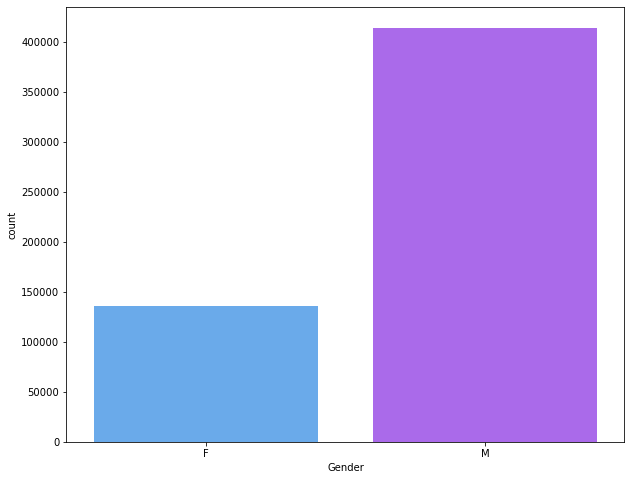

In [14]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Gender',data=df,palette='cool')
print(df['Gender'].value_counts())

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


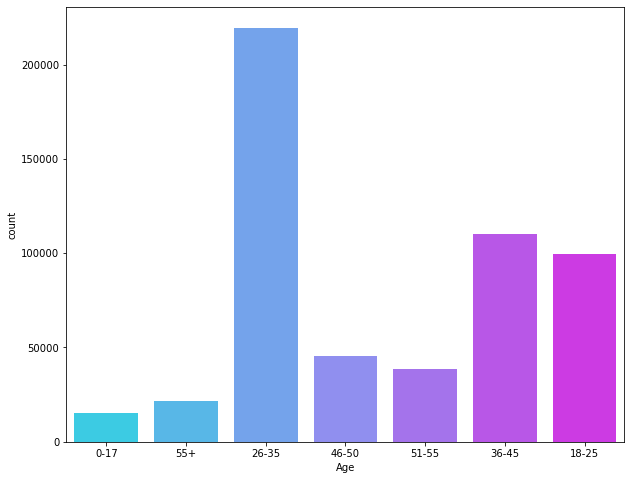

In [15]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Age',data=df,palette='cool')
print(df['Age'].value_counts())

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


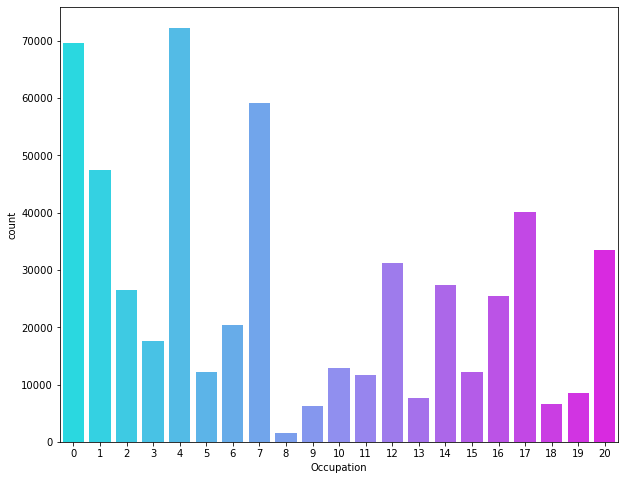

In [16]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Occupation',data=df,palette='cool')
print(df['Occupation'].value_counts())

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


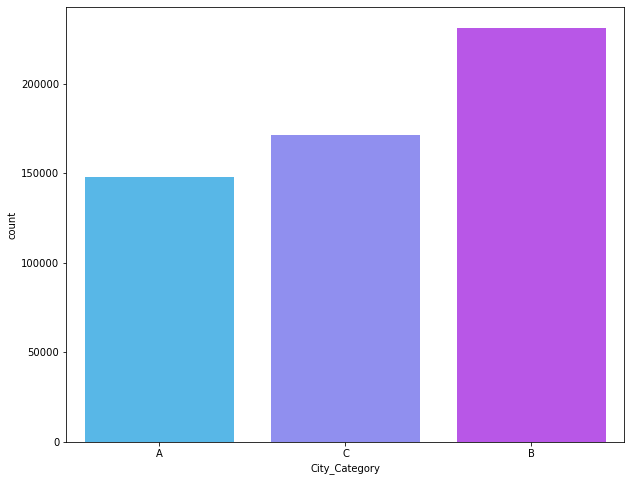

In [17]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='City_Category',data=df,palette='cool')
print(df['City_Category'].value_counts())

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


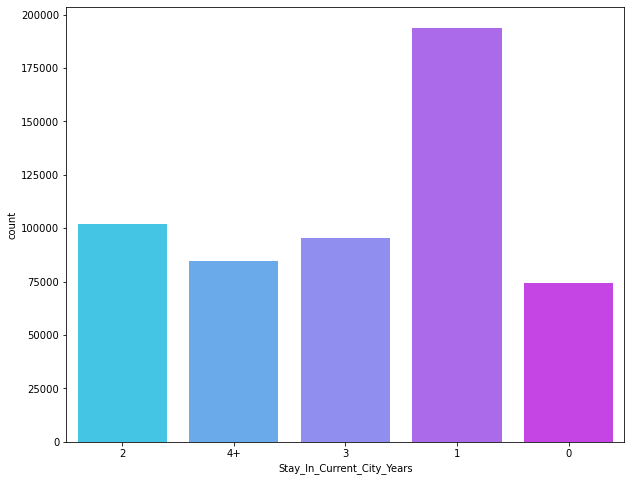

In [18]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Stay_In_Current_City_Years',data=df,palette='cool')
print(df['Stay_In_Current_City_Years'].value_counts())

0    324731
1    225337
Name: Marital_Status, dtype: int64


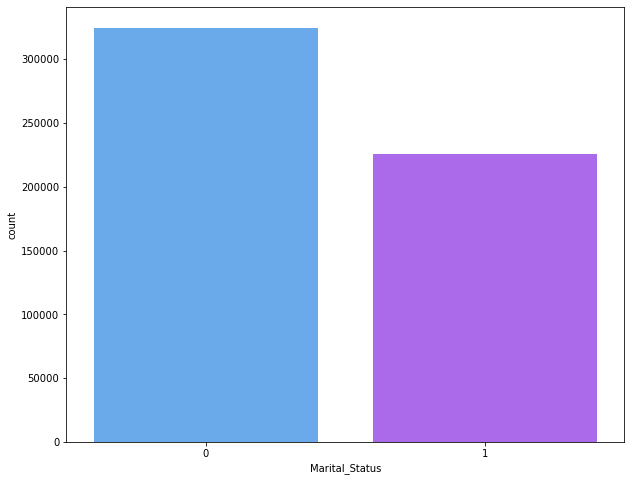

In [19]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Marital_Status',data=df,palette='cool')
print(df['Marital_Status'].value_counts())

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


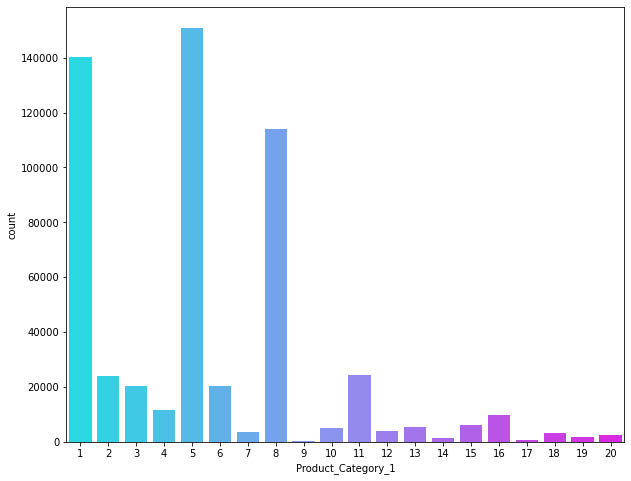

In [20]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Product_Category_1',data=df,palette='cool')
print(df['Product_Category_1'].value_counts())

8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64


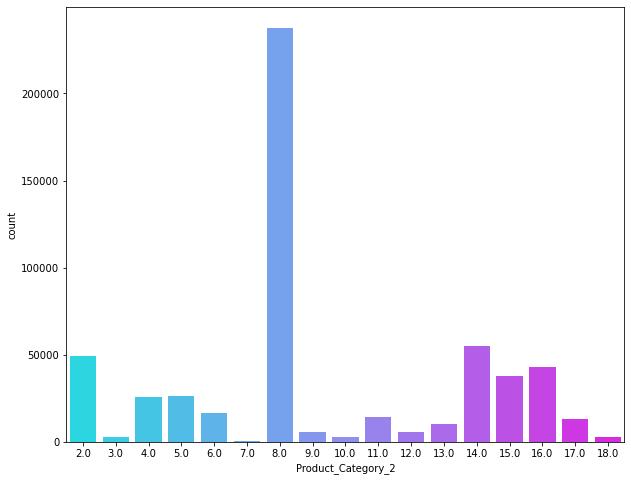

In [21]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='Product_Category_2',data=df,palette='cool')
print(df['Product_Category_2'].value_counts())

In [22]:
cat_col=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2']

In [23]:
len(cat_col)

8

In [24]:
# plt.figure(figsize=(20,25),facecolor='white')
# plotnumber=1
# for column in cat_col:
#     if plotnumber<=8:
#          plt.figure(figsize=(8,6))
#          ax=sns.countplot(x=df[column],data=df,palette='cool')
#     plotnumber+=1
# plt.tight_layout()

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

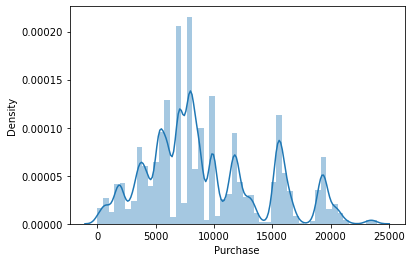

In [25]:
sns.distplot(df['Purchase'])

# Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

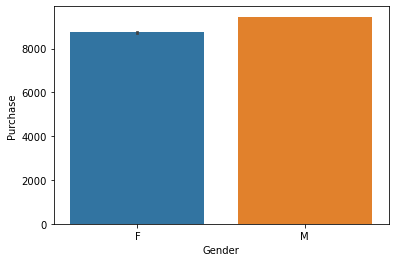

In [26]:
sns.barplot(df['Gender'],df['Purchase'])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

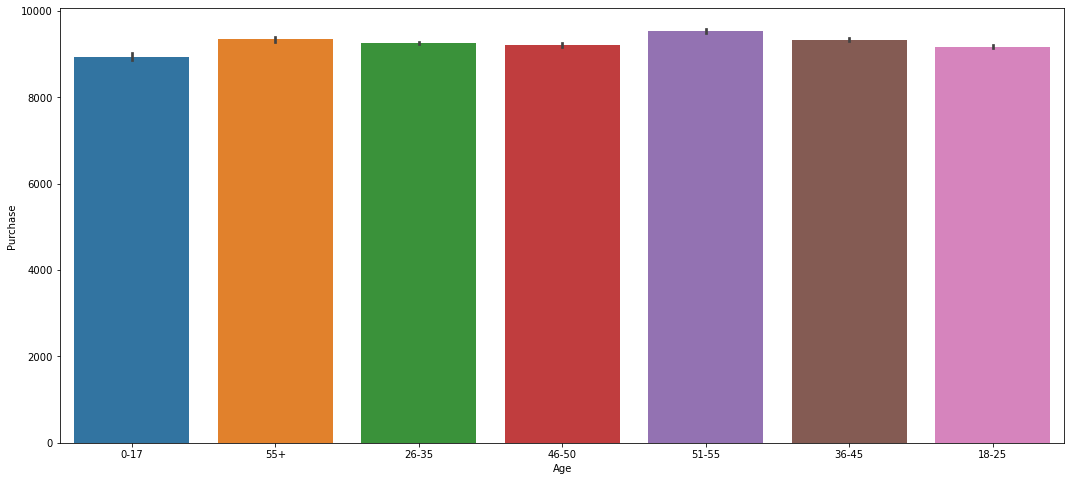

In [27]:
plt.figure(figsize=(18,8))
sns.barplot(df['Age'],df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

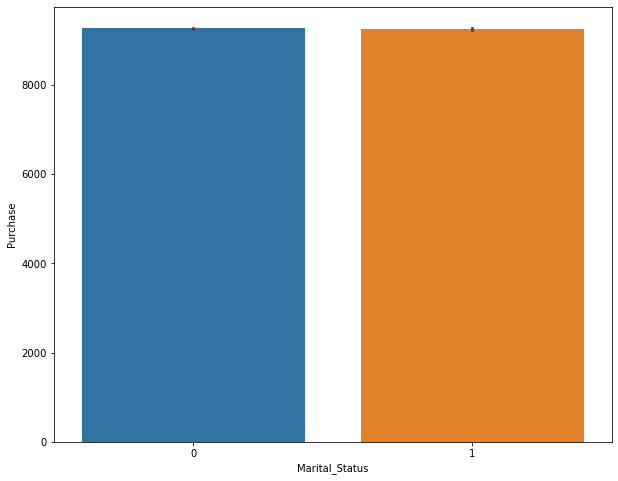

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(df['Marital_Status'],df['Purchase'])

# Multivariate analysis

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

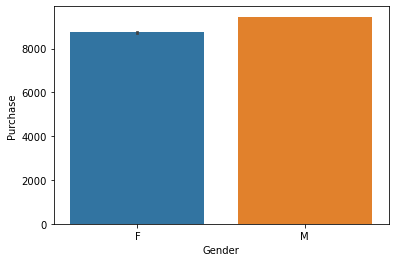

In [29]:
sns.barplot(df['Gender'],df['Purchase'])

### Now using encoder to encode the target variable

In [30]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in cat_col:
    df[i]=enc.fit_transform(df[i])
    

In [31]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,2,6,8370
1,1000001,P00248942,0,0,10,0,2,0,0,4,15200
2,1000001,P00087842,0,0,10,0,2,0,11,6,1422
3,1000001,P00085442,0,0,10,0,2,0,11,12,1057
4,1000002,P00285442,1,6,16,2,4,0,7,6,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,19,6,368
550064,1006035,P00375436,0,2,1,2,3,0,19,6,371
550065,1006036,P00375436,0,2,15,1,4,1,19,6,137
550066,1006038,P00375436,0,6,1,2,2,0,19,6,365


In [32]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int32
Age                            int32
Occupation                     int64
City_Category                  int32
Stay_In_Current_City_Years     int32
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Purchase                       int64
dtype: object

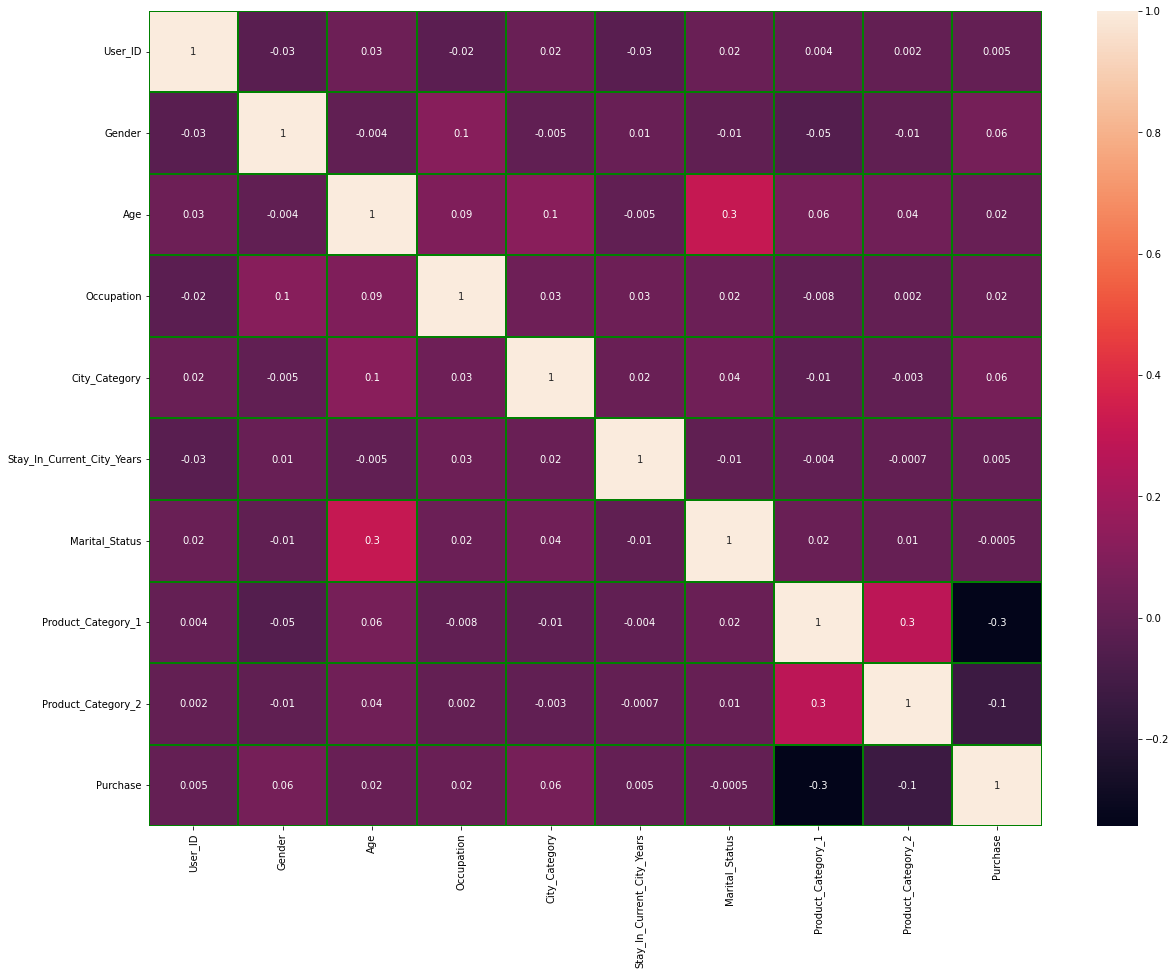

In [33]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,fmt=".1g",linecolor="green",annot=True)
plt.yticks(rotation=0);

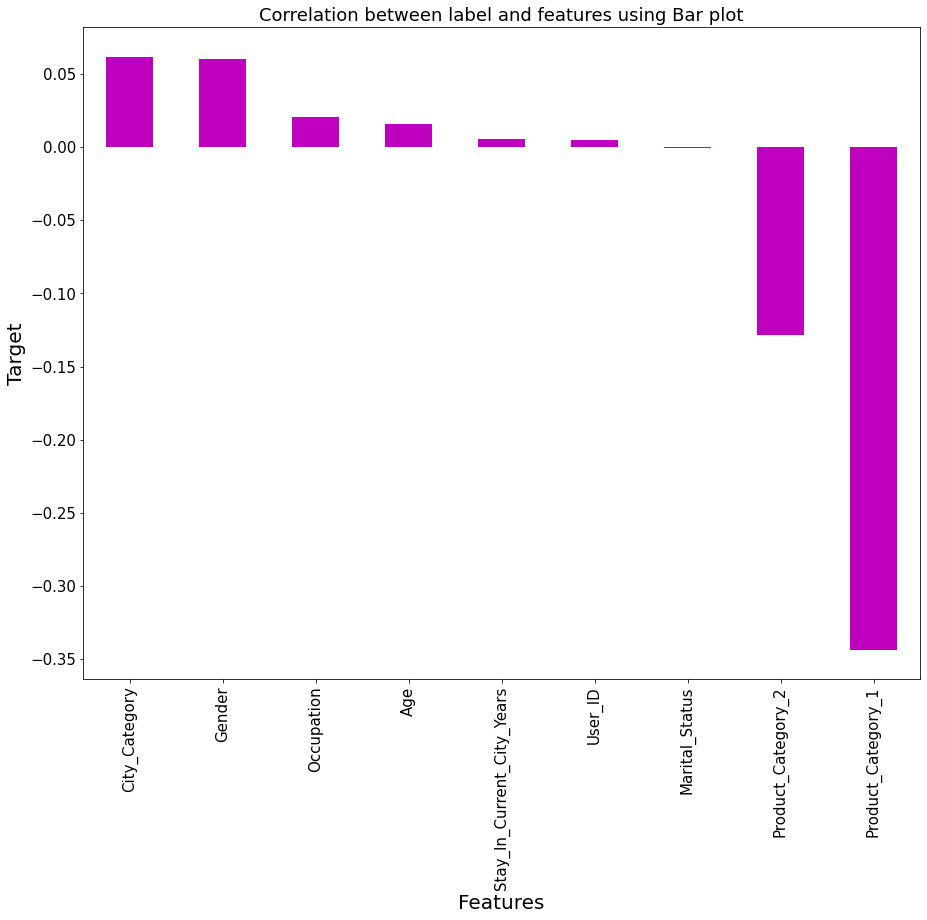

In [34]:
plt.figure(figsize=(15,12))
df.corr()['Purchase'].sort_values(ascending=False).drop(['Purchase']).plot(kind='bar',color='m',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()